# Used to transform data into Normal Data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('car_data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [5]:
data.fillna({'Price':data['Price'].mean()}, inplace=True)

In [6]:
data.isnull().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price             0
dtype: int64

/tmp/ipykernel_40079/3128728057.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'], hist=True, kde=True)


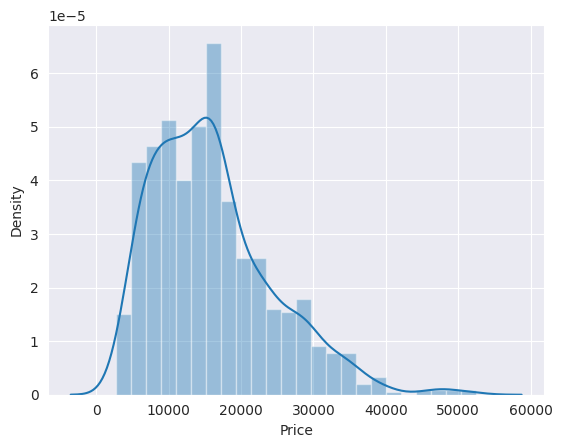

In [7]:
sns.distplot(data['Price'])
plt.show()

In [9]:
# Will remove Outliers first
q1=data['Price'].quantile(0.25)
q2=data['Price'].quantile(0.75)
q1,q2

(np.float64(9798.5), np.float64(20322.0))

In [10]:
IQR=q2-q1

In [12]:
max_range=q2+(1.5*IQR)
max_range

np.float64(36107.25)

In [21]:
data=data[data['Price']<max_range]

/tmp/ipykernel_19030/2155183341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


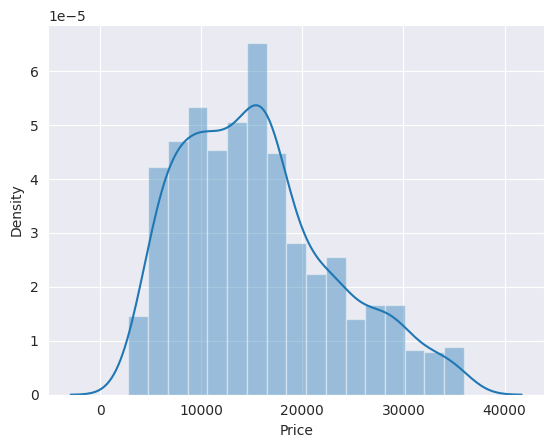

In [23]:
sns.distplot(data['Price'])
plt.show()

# Now i will do Function Transformation

In [24]:
from sklearn.preprocessing import FunctionTransformer

In [61]:
ft=FunctionTransformer(func=np.log1p)

In [62]:
data['Price_TF']=ft.fit_transform(data['Price'])
data['Price_TF']

/tmp/ipykernel_19030/3024965991.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_TF']=ft.fit_transform(data['Price'])


0       9.637176
1       9.900684
2      10.252171
3       9.505619
4       9.549951
         ...    
995    10.374834
996     8.651199
997    10.359994
998     8.294550
999     9.451952
Name: Price_TF, Length: 981, dtype: float64

In [63]:
data

,Make,Colour,Odometer (KM),Doors,Price,Price_TF
0,Honda,White,35431.0,4.0,15323.0,9.637176
1,BMW,Blue,192714.0,5.0,19943.0,9.900684
2,Honda,White,84714.0,4.0,28343.0,10.252171
3,Toyota,White,154365.0,4.0,13434.0,9.505619
4,Nissan,Blue,181577.0,3.0,14043.0,9.549951
...,...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0,10.374834
996,NaN,White,155144.0,3.0,5716.0,8.651199
997,Nissan,Blue,66604.0,4.0,31570.0,10.359994
998,Honda,White,215883.0,4.0,4001.0,8.294550


/tmp/ipykernel_19030/23206103.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])
/tmp/ipykernel_19030/23206103.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price_TF'])


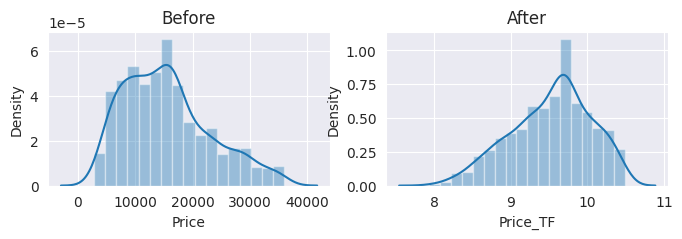

In [64]:
plt.figure(figsize=[8,2])
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(data['Price'])
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(data['Price_TF'])
plt.show()